In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', serif='Times')

In [3]:
name = ''
name += '_cpc'
name += '_alexnet'
name += f'_{"1"}'

In [4]:
def readSimilarity(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                val.append(float(row[ind]))
                
    return val

In [5]:
palette = {}
data = []

In [6]:
# seen matched
label_name = r'A'
palette[label_name] = '#7353ba'
seen_matched = readSimilarity(Path(f'uninitialised_familiar_analysis.csv'), 'similarity_A')
data = [[label_name, v] for v in seen_matched]

In [7]:
# seen mismatched
label_name = r'B'
palette[label_name] = '#edc531'
seen_mismatched = readSimilarity(Path(f'uninitialised_benji_analysis.csv'), 'similarity_A')
data.extend([[label_name, v] for v in seen_mismatched])

In [8]:
# unseen->unseen
label_name = r'C'
palette[label_name] = '#629460'
unseen_to_unseen = readSimilarity(Path(f'uninitialised_analysis.csv'), 'similarity_A')
data.extend([[label_name, v] for v in unseen_to_unseen])
mismatched_unseen_to_unseen = readSimilarity(Path(f'uninitialised_mismatched_me_analysis.csv'), 'similarity_A')
data.extend([[label_name, v] for v in mismatched_unseen_to_unseen])

In [9]:
# unseen->seen
label_name = r'D'
palette[label_name] = '#4a8fe7'
unseen_to_seen = readSimilarity(Path(f'uninitialised_analysis.csv'), 'similarity_B')
data.extend([[label_name, v]  for v in unseen_to_seen])
mismatched_unseen_to_seen = readSimilarity(Path(f'uninitialised_mismatched_me_analysis.csv'), 'similarity_B')
data.extend([[label_name, v] for v in mismatched_unseen_to_seen])

In [10]:
df = pd.DataFrame(data, columns=["label", "Similarity score"]
)

In [11]:
# plt.hist(np.asarray(seen_mismatched)/13000, color='red') #, rwidth=0.1
# plt.hist(np.asarray(unseen_to_seen)/20000, color='yellow')
# plt.hist(np.asarray(unseen_to_unseen)/20000, color='green')
# plt.hist(np.asarray(mismatched_unseen_to_seen)/20000, color='green')
# plt.hist(np.asarray(seen_matched)/13000, color='blue')
# plt.xticks([])
# plt.yticks([])
# plt.show() 

In [12]:
# sns.kdeplot(x=seen_mismatched)
# sns.kdeplot(x=unseen_to_seen)
# sns.kdeplot(x=unseen_to_unseen)
# sns.kdeplot(x=mismatched_unseen_to_seen)
# sns.kdeplot(x=seen_matched)
# plt.legend()

In [13]:
# fig = plt.figure(figsize=(12, 5))
# sns.set_style(style='white')
# f = sns.kdeplot(
#     df, x="Similarity score", hue="label", common_norm=False, legend=True, linewidth=2.5, 
#     palette=palette)#, bw_adjust=5)

# lss = [':', '-', ':', '-']

# handles = f.legend_.legendHandles[::-1]

# for line, ls, handle in zip(f.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
    
# subs = f.lines
# # xs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
# nums = ['D', 'C', 'B', 'A']
# for i in range(len(subs)):
#     x = subs[i].get_xdata() # Get the x data of the distribution
#     y = subs[i].get_ydata() # Get the y data of the distribution
#     c = subs[i].get_color()
#     maxid = np.argmax(y) # The id of the peak (maximum of y data)
# # #     plt.plot(x[maxid], y[maxid], 'bo', c=c, ms=10)
# # #     plt.plot([x[maxid], x[maxid]], [0, y[maxid]], c=c, linestyle='--')
#     if nums[i] != 'D':
#         x_coord = x[maxid]
#         y_coord = y[maxid]
#     else:
#         x_coord = x[maxid] - 0.015
#         y_coord = y[maxid] - 2.5
#     plt.annotate(f'{nums[i]}', (x_coord, y_coord), c=c, fontsize=30, ha='center', annotation_clip=False)
# # #     xs.append(int(np.round(x[maxid], 0)))

# sns.move_legend(f, "lower center", ncol=2, bbox_to_anchor=(0.5, -0.6), title='', frameon=True, fontsize=22)
# # plt.xlim(-0.05, 0.5)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Density', fontsize=26, labelpad=24)
# plt.xlabel('Similarity', fontsize=26, labelpad=24)
# axes = plt.gca()
# axes.spines[['top', 'right']].set_visible(False) 
# plt.savefig(f'uninitialised_similarity_densities.pdf',bbox_inches='tight')

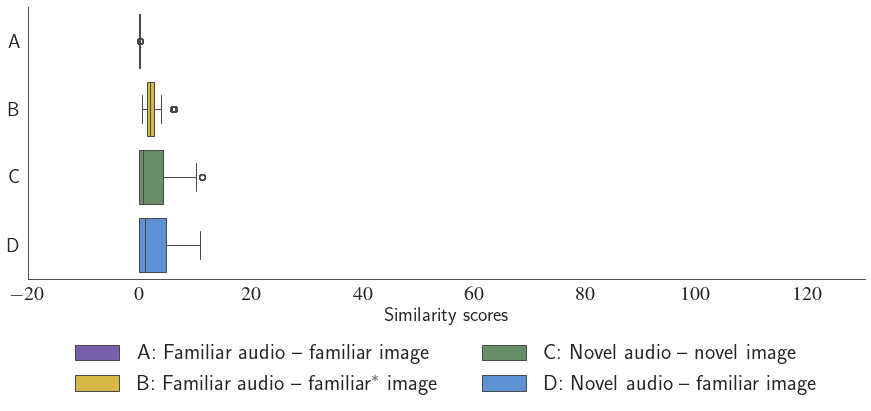

In [19]:
fig = plt.figure(figsize=(15, 5))
sns.set_style(style='white')
f = sns.boxplot(
    data=df, x="Similarity score", y="label", hue="label",
    # common_norm=False, 
    legend=True,
#     labels=['A', 'B', 'C', 'D'], 
#     linewidth=2.5, 
    palette=palette, 
#     log_scale=False,
)
handles, _ = f.get_legend_handles_labels()          # Get the artists.
f.legend(handles, 
         [r'A: Familiar audio -- familiar image', r'B: Familiar audio -- familiar$^*$ image', 
          r'C: Novel audio -- novel image', r'D: Novel audio -- familiar image'], 
         loc="best")
# hatches = ["o", "+", "o", "+"]
# for i, patch in enumerate(f.patches):
#     patch.set_color('red')
#     patch.set_facecolor('black')
#     patch.set_fill(False)
#     patch.set_hatch(hatches[i])

# f.set(xticklabels=[])
f.set(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Similarity scores', fontsize=20)
plt.xlim(-20, 130)
sns.move_legend(f, "lower center", ncol=2, bbox_to_anchor=(0.5, -0.5), title='', frameon=False, fontsize=22)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 
plt.savefig(f'unintialised_similarity_box_plots{name}.pdf',bbox_inches='tight')